```
Copyright © 2024 The Johns Hopkins University Applied Physics Laboratory LLC

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to
deal in the Software without restriction, including without limitation the
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or
sell copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY,
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR
IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
```

# Overview 
The following notebook can be referenced while exploring what participant count will be required for a knowledge management system evaluation.  This notebooks references several functions incorporated into the statistics_utils.py module.    

In [2]:
from eval_utils.statistics_utils import *

# Approximate via random sampling from assumed distributions

The below collection of cells can be used to approximate what sort of data distribution you'd expect to see for your prototype system and for the baseline system.  You can then sample from these distributions, and apply the data in a statistical test, and confirm whether an a p-value < 0.05 is achieved.  It is recommended to generate multiple sampling sets, to confirm a repeated p-value that is less than 0.05.   

It is under the discretion of the end user to determine what level of difference (or effect) between Prototype and Baseline they'd expect to need to detect.

### Generate Prototype and Baseline sample data for total time

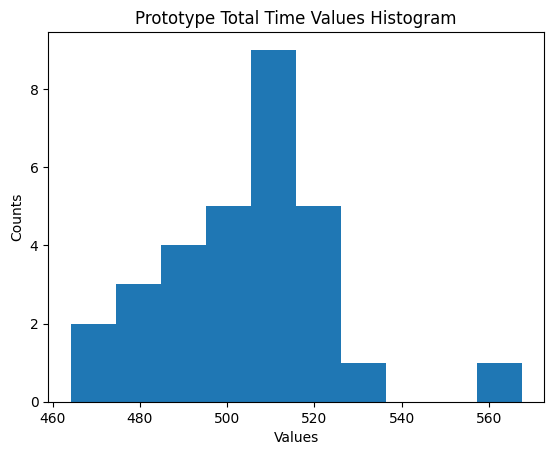

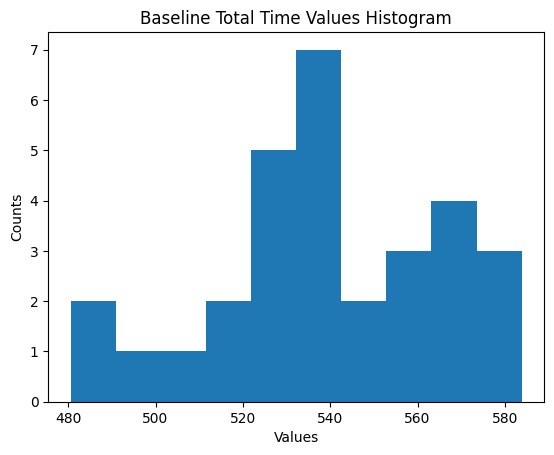

In [3]:
# let's generate some "total time" sample data for Prototype system
prototype_time_samples = generate_bounded_normal_dist_samples(mean = 500, 
                                               std_dev = 20, 
                                               upper_bound = np.inf, 
                                               lower_bound=0,  # notice lower bound since time can't be less than 0
                                               num_samples = 30)  # num_samples represents number of participants!

# let's generate some "total time" sample data for Baseline system
baseline_time_samples = generate_bounded_normal_dist_samples(mean = 540, 
                                               std_dev = 20, 
                                               upper_bound = np.inf, 
                                               lower_bound=0,  # notice lower bound since time can't be less than 0
                                               num_samples = 30)  # num_samples represents number of participants!

# plot histogram of Prototype time samples
plt.hist(prototype_time_samples)
plt.title("Prototype Total Time Values Histogram")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

# plot histogram of Baseline time samples
plt.hist(baseline_time_samples)
plt.title("Baseline Total Time Values Histogram")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

### Generate Prototype and Baseline sample data for task grade

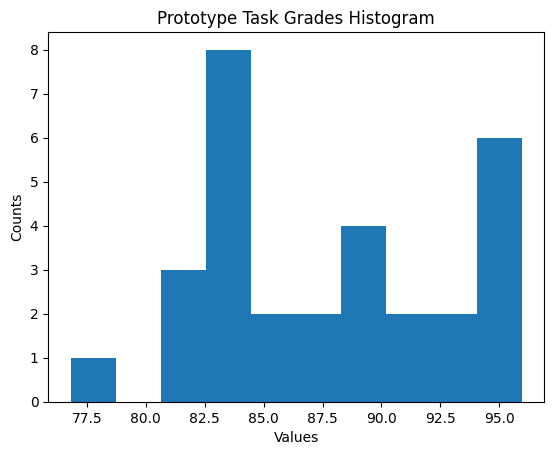

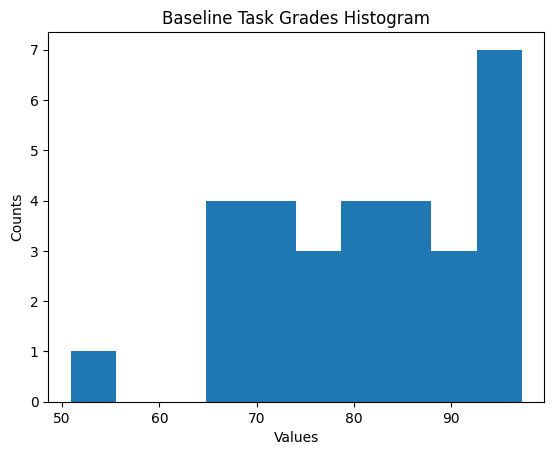

In [4]:
# let's generate some "task grade" sample data for Prototype system
prototype_grade_samples = generate_bounded_normal_dist_samples(mean = 90, 
                                               std_dev = 7, 
                                               upper_bound = 100, # notice upper bound, since 100% is max score
                                               lower_bound=0,     # notice lower bound, since 0% is min score
                                               num_samples = 30)  # num_samples represents number of participants!

# let's generate some "task grade" sample data for Baseline system
baseline_grade_samples = generate_bounded_normal_dist_samples(mean = 82, 
                                               std_dev = 11, 
                                               upper_bound = 100, # notice upper bound, since 100% is max score
                                               lower_bound=0,     # notice lower bound, since 0% is min score
                                               num_samples = 30)  # num_samples represents number of participants!

# plot histogram of Prototype task grade samples
plt.hist(prototype_grade_samples)
plt.title("Prototype Task Grades Histogram")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

# plot histogram of Baseline task grade samples
plt.hist(baseline_grade_samples)
plt.title("Baseline Task Grades Histogram")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

### Calculate statistical results and observe p-value 

We now can calculate the T-test result for time data and Mann-Whitney result for task grade data.  Note whether the p-value is less than 0.05. 

For total task time, a p-value less than 0.05 indicates that the mean of the Prototype total task times is less than that of the Baseline total task times, with statistical significance. 

For task grade, a p-value less than 0.05 indicates that the mean of the Prototype task grade is less than that of the Baseline task grade, with statistical significance. 

In [5]:
# calculate t-test result for time data 
t_test_result = calculate_t_test_statistic(prototype_time_samples, baseline_time_samples, alternative = 'less')
print(t_test_result)

if t_test_result.pvalue < 0.05:
    print(f'Result is statistically significant!  p-value = {t_test_result.pvalue}')
else:
    print(f'Result is NOT statistically significant!  p-value = {t_test_result.pvalue}')

TtestResult(statistic=-5.929450752761844, pvalue=1.056088454836255e-07, df=54.819489494511686)
Result is statistically significant!  p-value = 1.056088454836255e-07


In [6]:
# calculate mann-whitney result for task grade data
mann_whitney_result = calculate_mann_whitney_statistic(prototype_grade_samples, baseline_grade_samples, alternative = 'greater')
print(mann_whitney_result)

if mann_whitney_result.pvalue < 0.05:
    print(f'Result is statistically significant!  p-value = {mann_whitney_result.pvalue}')
else:
    print(f'Result is NOT statistically significant!  p-value = {mann_whitney_result.pvalue}')

MannwhitneyuResult(statistic=571.0, pvalue=0.03739936571802839)
Result is statistically significant!  p-value = 0.03739936571802839


# Approximate via Power Analysis

The below cells demonstrate how necessary participant counts can be calculated via power analysis.  This example assumes a t-test.

In [7]:
# calculate effect size for total time example; provide assumed means/variances for Prototype and Baseline respectively 
effect_size = estimate_t_test_effect_size(prototype_mean = 2500,
    prototype_std_dev = 25,
    baseline_mean = 2510,
    baseline_std_dev = 30)

print(effect_size)

-1.8411492357966468


In [8]:
# calculate the required sample size (participant count) to detect an effect size of 1.0, with statistical power = 80%
sample_size = estimate_t_test_required_sample_size(alpha = 0.05,
    power = 0.8,
    effect_size = 1.0)

Sample Size: 14


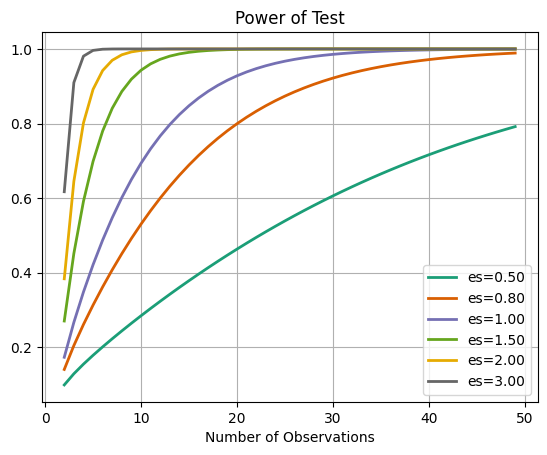

In [9]:
# display a t-test power curve for various effect sizes (y-axis is statistical power, x-axis is number of participants
fig = display_t_test_power_curve()